# **Python Visualization - Nilson Jhon Muñoz Nifla**

# **1. Objetivo del Análisis**
## **Definición del Problema de Negocio**
BigMart es una empresa de retail que vende diversos productos en 10 tiendas de diferentes ciudades. Debido al impacto del COVID-19, algunos productos de alta rotación han comenzado a quedarse en el almacén, generando un problema de sobrestock y reduciendo el espacio disponible para otros productos. Esto afecta la capacidad de la empresa para optimizar su inventario y realizar pedidos eficientes a proveedores.

## **Objetivo del Análisis**
El objetivo es encontrar una manera óptima de gestionar el inventario y mejorar la precisión de los pedidos a proveedores. Para ello, se utilizará el análisis de datos para:

1. Identificar patrones de ventas en diferentes productos y tiendas.

2. Detectar productos con sobrestock y entender las razones detrás de este fenómeno.
3. Predecir la demanda de productos en el futuro inmediato, especialmente para el primer trimestre de 2021 (Q1-2021).
4. Optimizar la gestión del inventario, reduciendo el espacio desperdiciado y mejorando la rentabilidad.
5. Segmentar tiendas y productos para encontrar diferencias en el comportamiento de ventas según la ubicación y características de la tienda.

## **Variables Clave a Analizar**
Algunas variables que ayudarán en el análisis incluyen:


*   **Item_Outlet_Sales** (Ventas por producto en cada tienda) → Métrica clave a analizar.
*   **Item_Type** (Categoría del producto) → Para identificar qué tipos de productos están afectados.
*   **Item_Visibility** (Visibilidad del producto en la tienda) → Para ver si la ubicación en la tienda afecta las ventas.
*   **Outlet_Location_Type** (Ubicación de la tienda) → Para evaluar diferencias entre ciudades.
*   **Outlet_Size** (Tamaño de la tienda) → Para ver si influye en las ventas o en el sobrestock.
*   **Item_MRP** (Precio del producto) → Para analizar si el precio está afectando la demanda.



## **2. Carga y Comprensión de los Datos**

###**Carga de datos**

In [ ]:
import pandas as pd

filecsv = "/content/drive/MyDrive/Python Visualization/BigMartSales.csv"
df_train = pd.read_csv(filecsv,encoding='latin1')
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


###**Inspeccionar los datos**

In [ ]:
#Primeras filas
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#Tipos de datos y valores nulos
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#Estadísticas descriptivas
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#Dimensiones (filas, columnas)
df_train.shape

(8523, 12)

##**3. Limpieza de Datos**

###**Manejo de valores nulos**
**Outlet_Size (Tamaño de la Tienda) → 28.28% de nulos**.

* **¿Es importante?** Sí, el tamaño de la tienda puede afectar la estrategia de inventario.



In [ ]:
# Rellenar Outlet_Size con la moda
df_train['Outlet_Size'] = df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Item_Weight (Peso del Producto) → 17.17% de nulos**.
* **¿Es importante?** No, ya que no es una variable clave que elejimos para analizar.

In [ ]:
#Eliminar columna
df_train.drop(columns=['Item_Weight'], inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


##**4. Análisis univariado**

In [ ]:
#Metrica clave
df_train['Item_Outlet_Sales'].describe()

,Item_Outlet_Sales
count,8523.000000
mean,2181.288914
std,1706.499616
min,33.290000
25%,834.247400
50%,1794.331000
75%,3101.296400
max,13086.964800


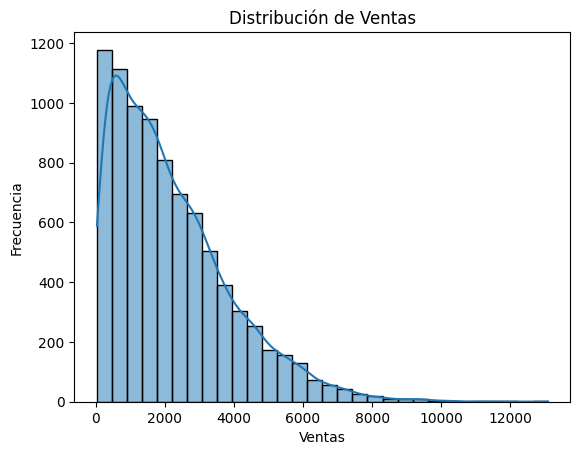

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_train['Item_Outlet_Sales'], bins=30, kde=True)
plt.title("Distribución de Ventas")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.show()

**Distribucion de Ventas:**


*   La mayoria de los productos tiene ventas bajas, pero hay algunos con ventas muy altas.
*   Hay productos con baja rotación, alieneado con el problema de sobrestock.



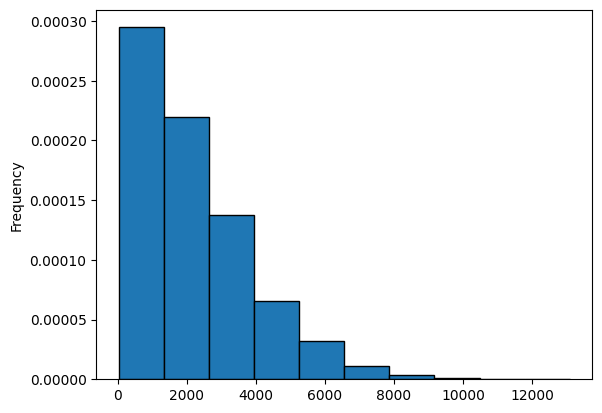

In [ ]:
df_train['Item_Outlet_Sales'].plot(kind='hist',density=True, edgecolor = 'k')
plt.show()

**Variables Numéricas Clave:**

*   Item_Visibility → Visibilidad del producto en la tienda
*   Item_MRP → Precio máximo del producto
*   Item_Outlet_Sales → Ventas del producto en la tienda (variable objetivo)

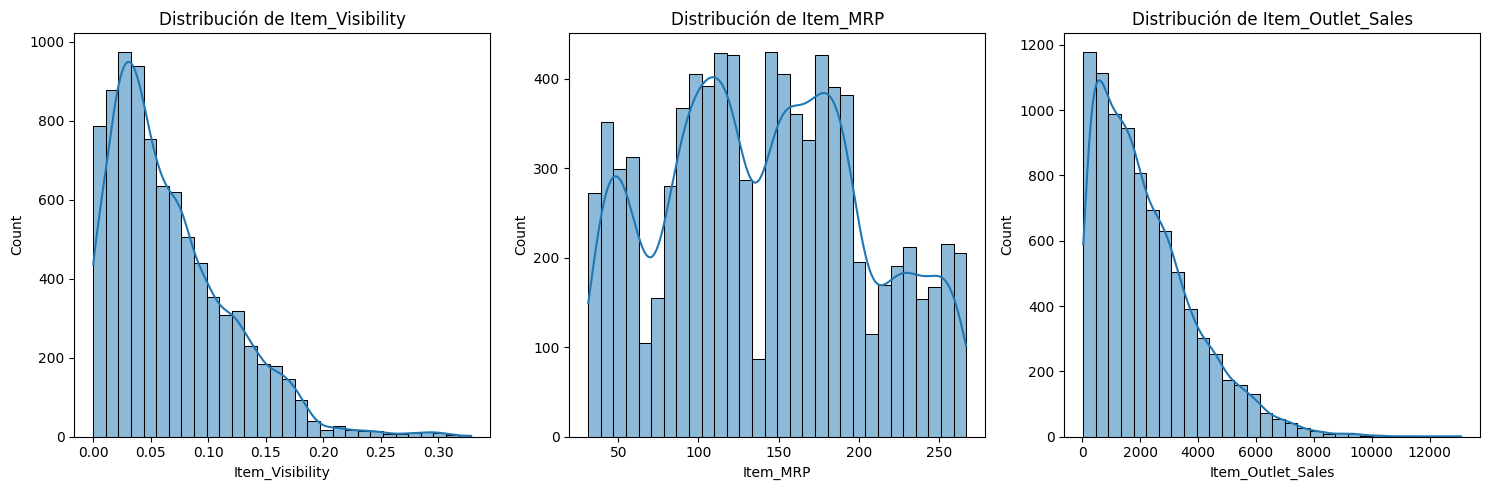

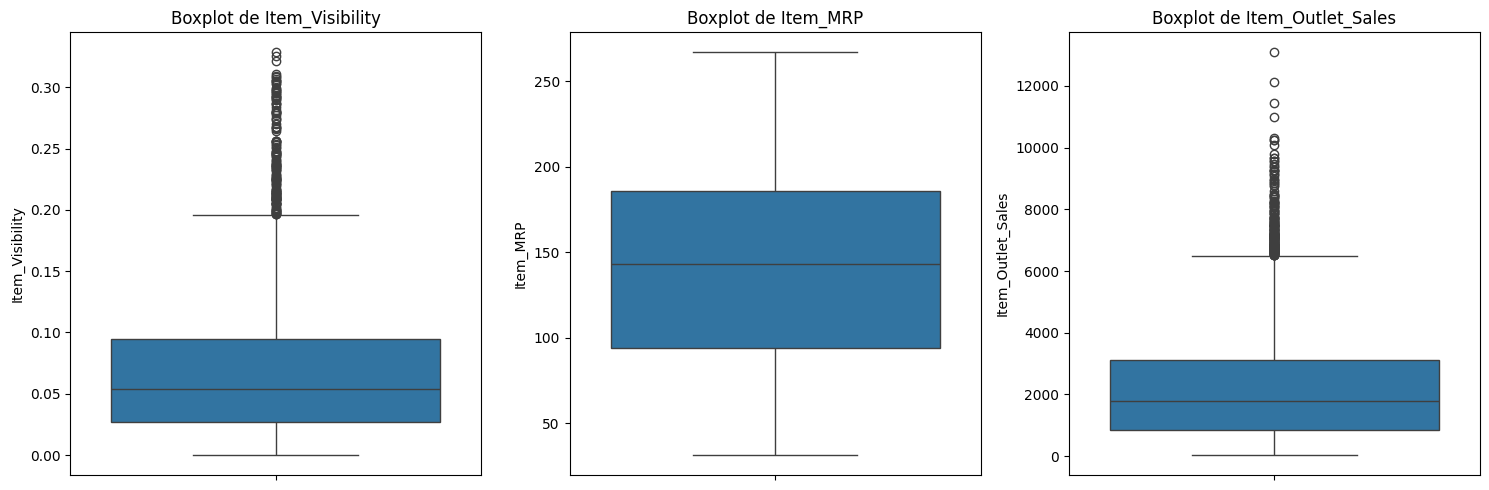

In [ ]:
#VARIABLES NUMERICAS CLAVE
num_vars = ["Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]

#Estadisticas descriptivas
desc_stats = df_train[num_vars].describe()

#Graficar histogramas y boxplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, var in enumerate(num_vars):
    sns.histplot(df_train[var], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribución de {var}")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, var in enumerate(num_vars):
    sns.boxplot(y=df_train[var], ax=axes[i])
    axes[i].set_title(f"Boxplot de {var}")

plt.tight_layout()
plt.show()



1.   **Visibilidad del Producto (Item_Visibility)**

  *   Rango entre 0.003 y 0.328.
  *   Distribución sesgada con valores bajos, lo que sugiere que algunos productos tienen muy poca visibilidad.
  *   Posible impacto: baja visibilidad podría estar afectando las ventas.

2.   **Precio Máximo (Item_MRP)**
  *   Promedio: 140.99, con valores entre 31.29 y 266.88.
  *   Distribución bimodal, lo que sugiere que los productos pueden estar divididos en dos segmentos de precios.
  *   Posible impacto: el precio podría influir en la demanda y ventas.
3.   **Ventas por Producto (Item_Outlet_Sales)**
  *   Promedio: 2,181, pero con una gran variabilidad (máximo: 13,086).
  *   Distribución sesgada hacia la derecha con outliers (productos con ventas excepcionalmente altas).
  *   Posible impacto: algunos productos pueden estar generando la mayoría de las ventas.



**Variables Categóricas Clave:**


*   Item_Type → Categoría del producto
*   Outlet_Location_Type → Ubicación de la tienda
*   Outlet_Size → Tamaño de la tienda



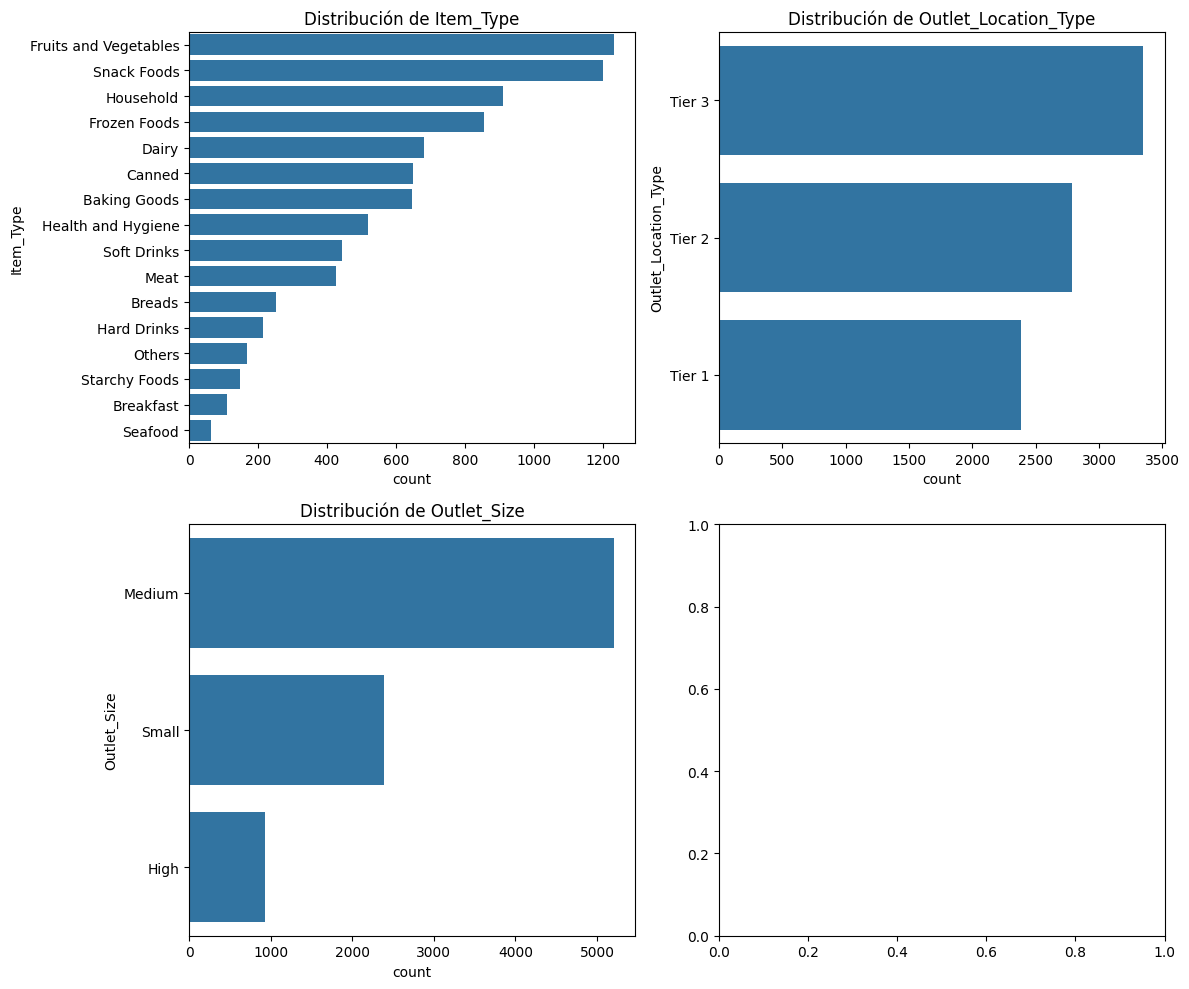

,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,2181.288914
std,0.051598,62.275067,1706.499616
min,0.000000,31.290000,33.290000
25%,0.026989,93.826500,834.247400
50%,0.053931,143.012800,1794.331000
75%,0.094585,185.643700,3101.296400
max,0.328391,266.888400,13086.964800


In [ ]:
#VARIABLES CATEGORICAS CLAVE
cat_vars = ["Item_Type", "Outlet_Location_Type", "Outlet_Size"]

#Graficar distribucion de variables categoricas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(cat_vars):
    sns.countplot(y=df_train[var], order=df_train[var].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Distribución de {var}")

plt.tight_layout()
plt.show()

desc_stats



1.   **Categoría del Producto (Item_Type)**
  * Más frecuentes: "Fruits and Vegetables", "Snack Foods" y "Household".
  * Posible impacto: algunas categorías pueden ser más susceptibles al sobrestock.
2.   **Ubicación de la Tienda (Outlet_Location_Type)**
  * Mayoría de tiendas en ciudades Tier 3.
  * Posible impacto: la demanda podría variar según la ubicación.
3.   **Tamaño de la Tienda (Outlet_Size)**
  * Predominan tiendas "Medium", seguidas de "Small".
  * Posible impacto: tiendas más pequeñas pueden enfrentar más problemas de almacenamiento.



##**5. Análisis bivariado**

### **Análisis Bivariado con Variables Numéricas**


*   Item_MRP (Precio del Producto)
*   Item_Visibility (Visibilidad en Tienda)



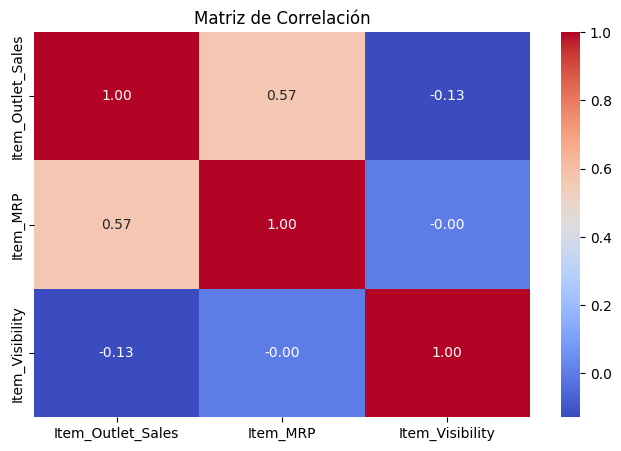

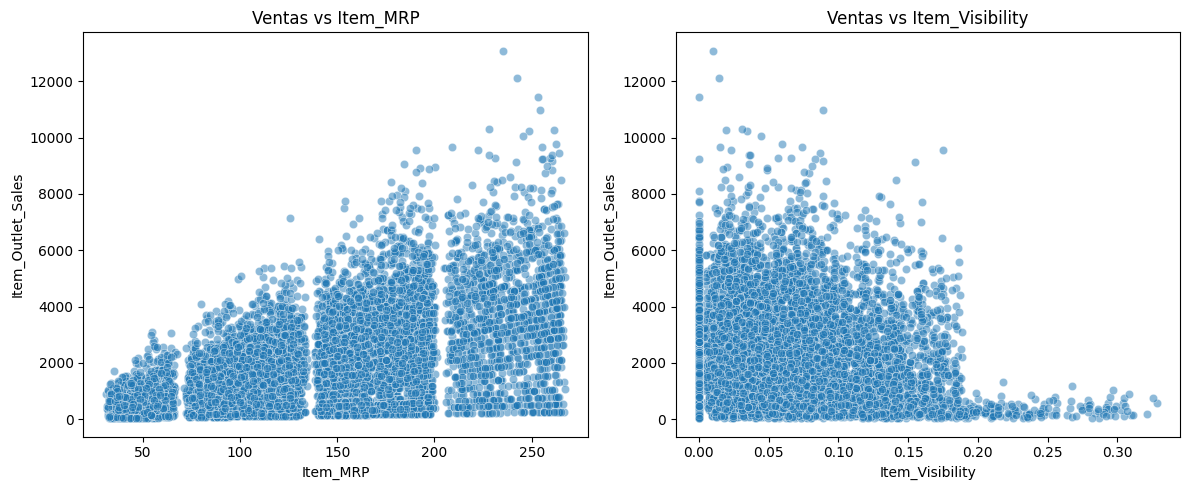

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Variables numericas a analizar
num_vars = ["Item_MRP", "Item_Visibility"]

#Matriz de correlacion
plt.figure(figsize=(8, 5))
sns.heatmap(df_train[["Item_Outlet_Sales"] + num_vars].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

#Graficar Scatter Plots
plt.figure(figsize=(12, 5))
for i, var in enumerate(num_vars):
    plt.subplot(1, len(num_vars), i + 1)
    sns.scatterplot(x=df_train[var], y=df_train["Item_Outlet_Sales"], alpha=0.5)
    plt.title(f"Ventas vs {var}")

plt.tight_layout()
plt.show()


**Relación entre Variables Numéricas y Ventas**


*   Item_MRP (Precio del Producto) tiene correlación positiva con las ventas. Es decir, los productos más caros tienden a venderse más.
*   Item_Visibility tiene correlación débil o casi nula con las ventas, lo que indica que la visibilidad en la tienda no es un factor determinante en la demanda.
*   Se observa una tendencia en la que algunos productos con precios más altos tienen mayores ventas.
*   Algunos productos con baja visibilidad aún tienen altas ventas, lo que confirma que la visibilidad no es un factor clave.



### **Análisis Bivariado con Variables Categóricas**


*   Item_Type (Categoría del Producto)
*   Outlet_Location_Type (Ubicación de la Tienda)
*   Outlet_Size (Tamaño de la Tienda)
*   Item_Fat_Content (Contenido de Grasa)

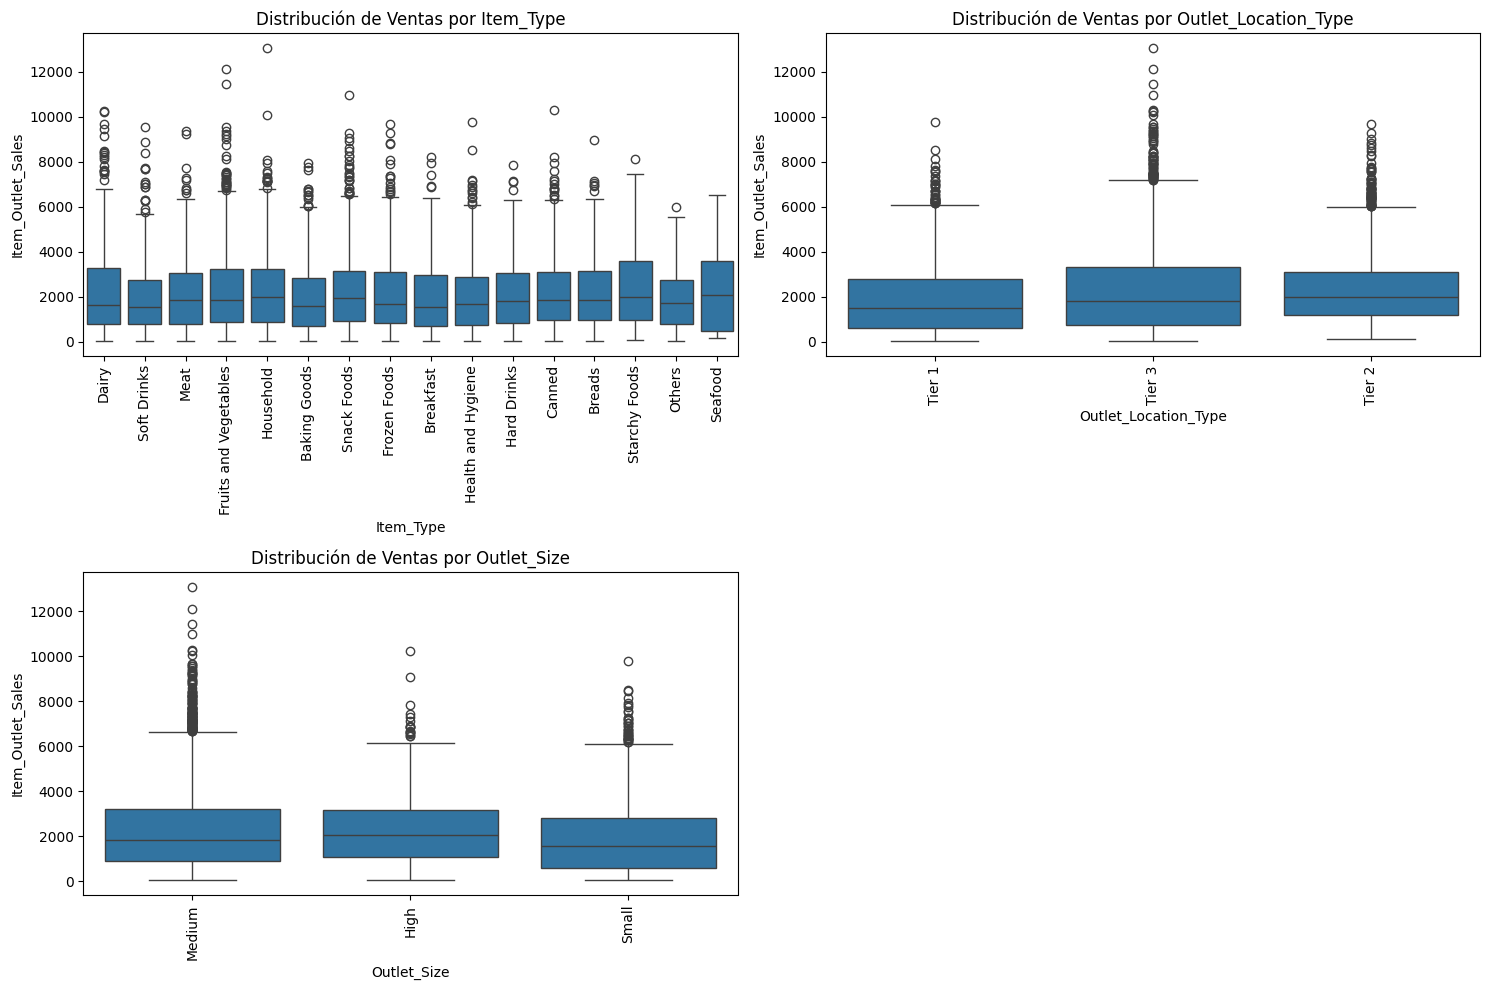

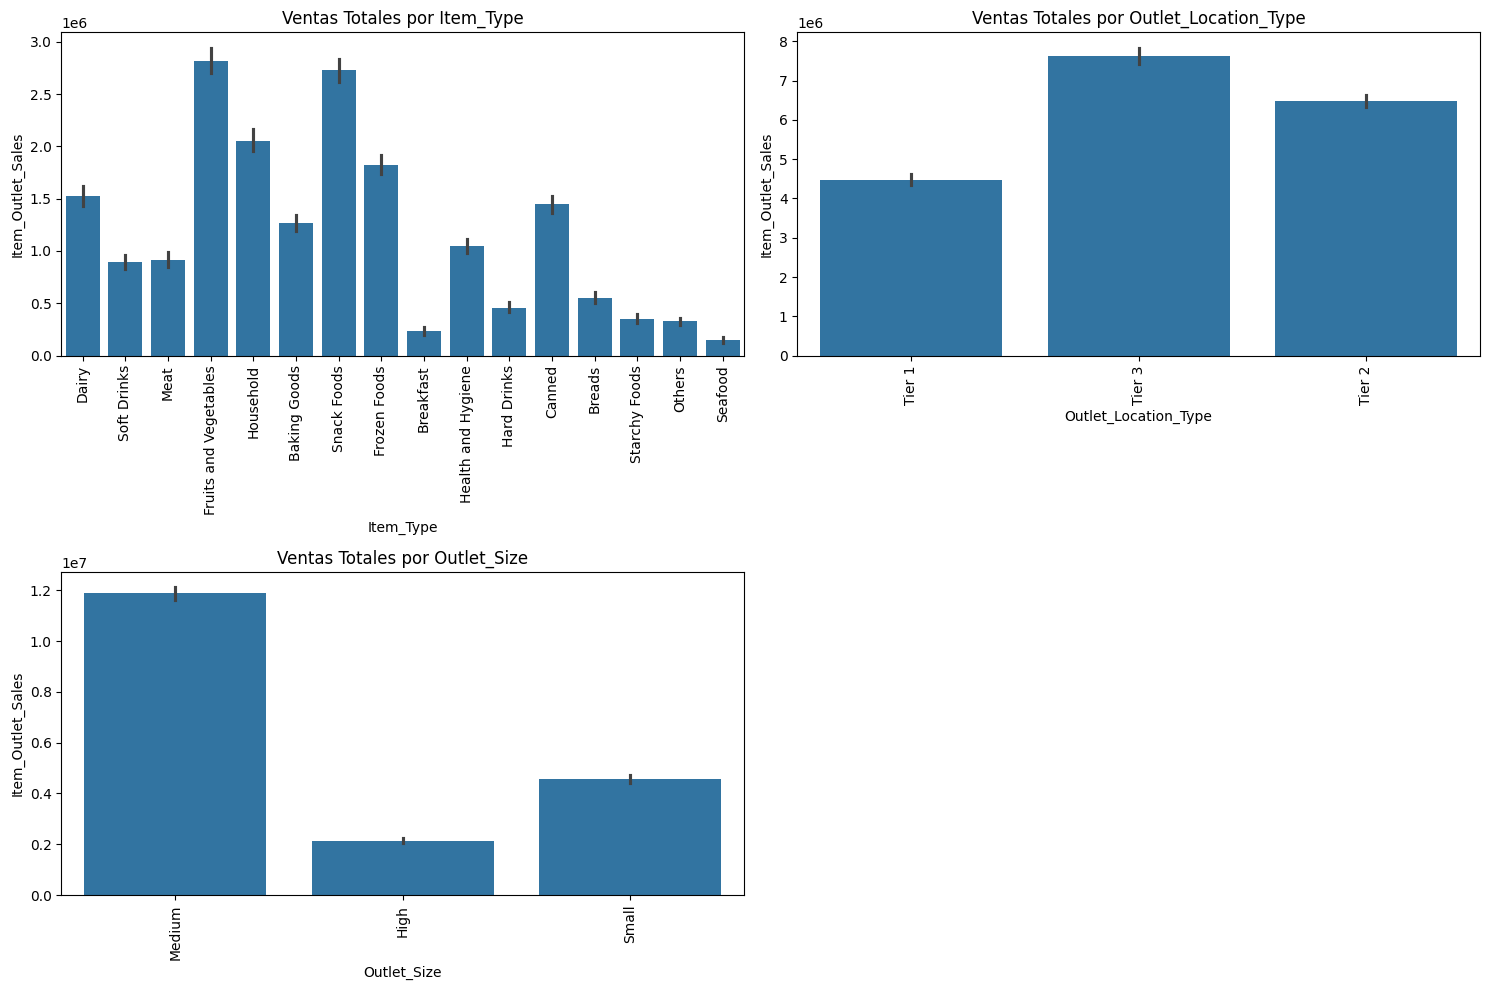

In [ ]:
# Variables categóricas clave
cat_vars = ["Item_Type", "Outlet_Location_Type", "Outlet_Size"]

# Graficar Boxplots
plt.figure(figsize=(15, 10))
for i, var in enumerate(cat_vars):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df_train[var], y=df_train["Item_Outlet_Sales"])
    plt.xticks(rotation=90)
    plt.title(f"Distribución de Ventas por {var}")

plt.tight_layout()
plt.show()

# Graficar Barras
plt.figure(figsize=(15, 10))
for i, var in enumerate(cat_vars):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=df_train[var], y=df_train["Item_Outlet_Sales"], estimator=sum)
    plt.xticks(rotation=90)
    plt.title(f"Ventas Totales por {var}")

plt.tight_layout()
plt.show()


**Relación entre Variables Categóricas y Ventas**


*   Item_Type (Categoría del Producto): Algunos tipos de productos tienen ventas significativamente más altas, como "Fruits and Vegetables" y "Snack Foods", mientras que otros tienen menor demanda.
*   Outlet_Location_Type (Ubicación de la Tienda):
  * Las tiendas ubicadas en "Tier 3" tienen las mayores ventas, lo que indica que en ciudades más grandes hay mayor demanda.
  * Las ubicadas en "Tier 1" tienen ventas más bajas.
*   Outlet_Size (Tamaño de la Tienda):
  * Las tiendas medianas generan más ventas en promedio.
  * Las tiendas pequeñas tienen menor rendimiento.



##**6. Valores Atípicos (Outliers)**


1.   Item_Outlet_Sales (Ventas por producto en cada tienda)
2.   Item_MRP (Precio del producto)
3.   Item_Visibility (Visibilidad del producto)


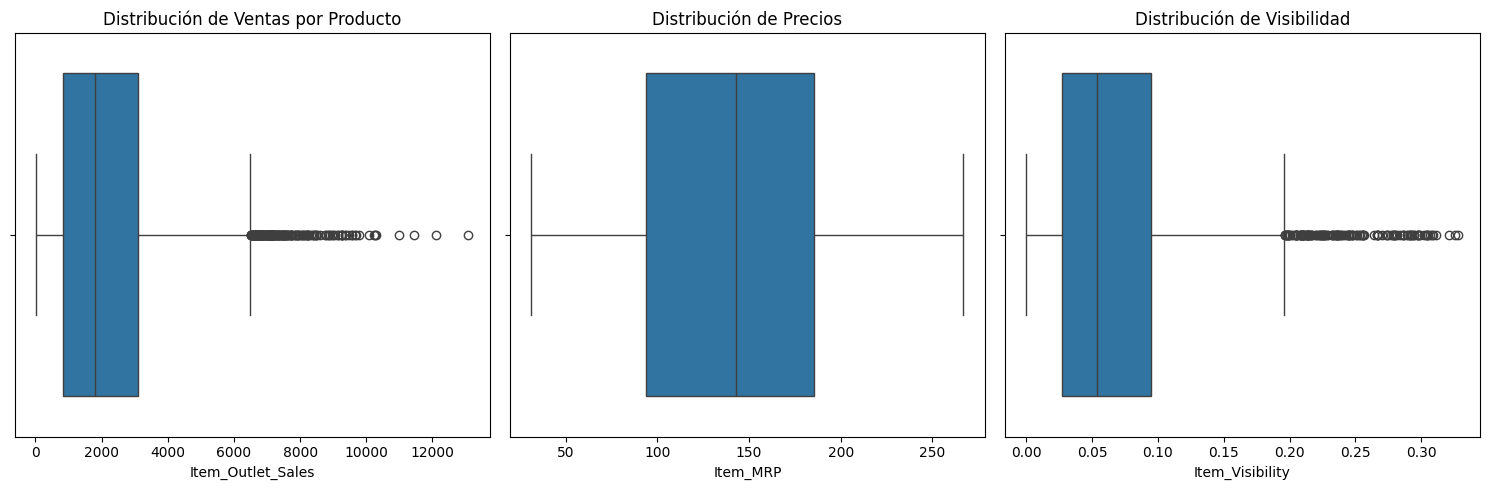

{'Item_Outlet_Sales': 186, 'Item_MRP': 0, 'Item_Visibility': 144}

In [ ]:
def detectar_outliers(columna):
    Q1 = df_train[columna].quantile(0.25)
    Q3 = df_train[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_train[(df_train[columna] < lower_bound) | (df_train[columna] > upper_bound)]
    return outliers, lower_bound, upper_bound

#Identificar outliers en las variables clave
outliers_sales, lb_sales, ub_sales = detectar_outliers("Item_Outlet_Sales")
outliers_mrp, lb_mrp, ub_mrp = detectar_outliers("Item_MRP")
outliers_visibility, lb_visibility, ub_visibility = detectar_outliers("Item_Visibility")

#Conteo de outliers
outliers_count = {
    "Item_Outlet_Sales": len(outliers_sales),
    "Item_MRP": len(outliers_mrp),
    "Item_Visibility": len(outliers_visibility),
}

#Visualizacion de outliers con boxplots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df_train["Item_Outlet_Sales"])
plt.title("Distribución de Ventas por Producto")

plt.subplot(1, 3, 2)
sns.boxplot(x=df_train["Item_MRP"])
plt.title("Distribución de Precios")

plt.subplot(1, 3, 3)
sns.boxplot(x=df_train["Item_Visibility"])
plt.title("Distribución de Visibilidad")

plt.tight_layout()
plt.show()

#Mostrar cantidad de outliers
outliers_count

**Resultados del Análisis de Outliers**


*   Item_Outlet_Sales (Ventas por producto en cada tienda): 186 valores atípicos.
*   Item_MRP (Precio del producto): No tiene outliers detectados.
*   Item_Visibility (Visibilidad del producto): 144 valores atípicos, probablemente valores extremadamente bajos o cercanos a 0.



**Observaciones:**


*   Los outliers en ventas podrían ser productos con demanda inusualmente alta o baja.
*   La visibilidad del producto con valores extremadamente bajos puede indicar problemas en la asignación de datos o en la disposición de productos en la tienda.



______